This is a notebook for data visualization, to make sure transformations are correct and otjher stuff.

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/home/ubuntu/projects/neural226')
import pandas as pd
import matplotlib.pyplot as plt
import torch
import numpy as np
from torchvision import datasets, transforms
from rean.data.Dataset import make_datasets
from rean.data.DataTransforms import AnisoNoise

In [8]:
#define transformation parameters:
group_order = 4
noise = "aniso"
noise_params = {'mean': 0, 'std': 0.3, "gamma": 5}

In [11]:
train_aniso, _, _, _ = make_datasets(train_noise = noise, noise_params = noise_params, group_order = group_order, rotate_train=True)
train_iso, _, _, _ = make_datasets(train_noise = "iso", noise_params = noise_params, group_order = group_order, rotate_train=True)
train_clean = make_datasets(train_noise = None, noise_params = noise_params, group_order = group_order, rotate_train=True)[0]


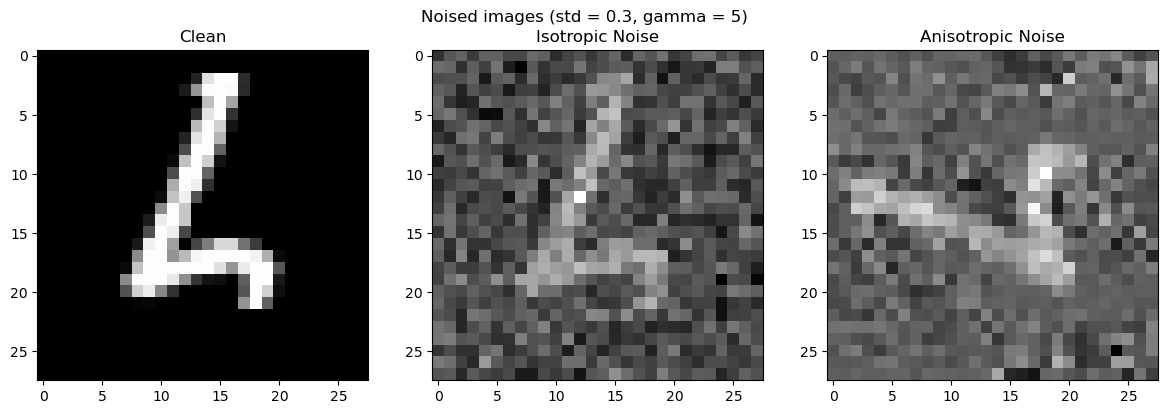

In [12]:
i = 1
clean = train_clean[i][0]
iso = train_iso[i][0]
aniso = train_aniso[i][0]

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize = (12, 4))
fig.suptitle(f"Noised images (std = {noise_params['std']}, gamma = {noise_params['gamma']})")

ax0.imshow(clean[0], cmap = 'gray')
ax0.set_title("Clean")


ax1.imshow(iso[0], cmap = 'gray')
ax1.set_title("Isotropic Noise")

ax2.imshow(aniso[0], cmap = 'gray')
ax2.set_title("Anisotropic Noise")

fig.tight_layout()
fig.savefig("noised_examples.png")


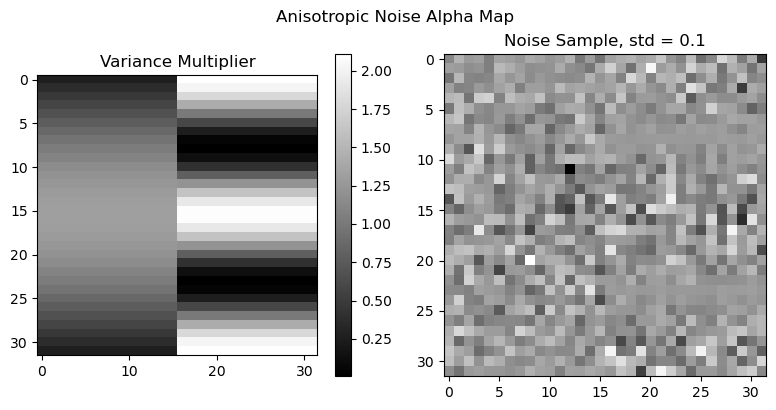

In [16]:
#vizualize alpha
H = 32
W = 32
noise_params = {'mean': 0, 'std': 0.1, "gamma": 2}
aniso_transform = AnisoNoise(**noise_params)
x = torch.ones(1, H, W) #single channel image
noise = aniso_transform(x)
alpha = aniso_transform.alpha
fig, (ax0, ax1) = plt.subplots(1, 2, figsize = (8, 4))
fig.suptitle("Anisotropic Noise Alpha Map")

ax0.imshow(alpha, cmap = 'gray')
ax0.set_title("Variance Multiplier")


ax1.imshow(noise.squeeze(), cmap = 'gray')
ax1.set_title(f"Noise Sample, std = {noise_params['std']}")

fig.tight_layout()
cbar = fig.colorbar(ax0.images[0], ax = ax0)
fig.savefig("aniso_map.png")
